# Remote data access using pandas

The pandas library enables access to data displayed on websites using the `read_html()` function and access to the API endpoints of various data providers through the related `pandas-datareader` library.

## Imports & Settings

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
%matplotlib inline
import os
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

## Download html table with SP500 constituents

The download of the content of one or more html tables works as follows, for instance for the constituents of the S&P500 index from Wikipedia

In [15]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_constituents = pd.read_html(sp_url, header=0)[0]#主要用于爬取网页的表格，注意图片是不能爬取的

In [19]:
sp500_constituents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 502 non-null    object
 1   Security               502 non-null    object
 2   SEC filings            502 non-null    object
 3   GICS Sector            502 non-null    object
 4   GICS Sub-Industry      502 non-null    object
 5   Headquarters Location  502 non-null    object
 6   Date first added       457 non-null    object
 7   CIK                    502 non-null    int64 
 8   Founded                502 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.4+ KB


In [20]:
sp500_constituents.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


## pandas-datareader for Market Data

`pandas` used to facilitate access to data providers' APIs directly, but this functionality has moved to the related pandas-datareader library. The stability of the APIs varies with provider policies, and as of June 2o18 at version 0.7, the following sources are available

See [documentation](https://pandas-datareader.readthedocs.io/en/latest/); functionality frequently changes as underlying provider APIs evolve.

### Yahoo Finance

In [21]:
start = '2014'
end = datetime(2017, 5, 24)

yahoo= web.DataReader('FB', 'yahoo', start=start, end=end)
#DataReader可从多个金融网站获取到股票数据，如“Yahoo! Finance” 、“Google Finance”等。第三、四个参数为股票数据的起始时间断
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-10-01 to 2022-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    int64  
 5   Adj Close  252 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


### data必须是pandas.DataFrame数据类型，对所包含的列也有要求，必须包含’Open’, ‘High’, ‘Low’ 和 ‘Close’ 数据（注意:首字母是大写的），而且行索引必须是pandas.DatetimeIndex，行索引的名称必须是’Date‘(同理注意首字母大写)，此外还有一列是’Volume’，这一列不是必须的，可选项（前提是你不想绘制成交量的话）。

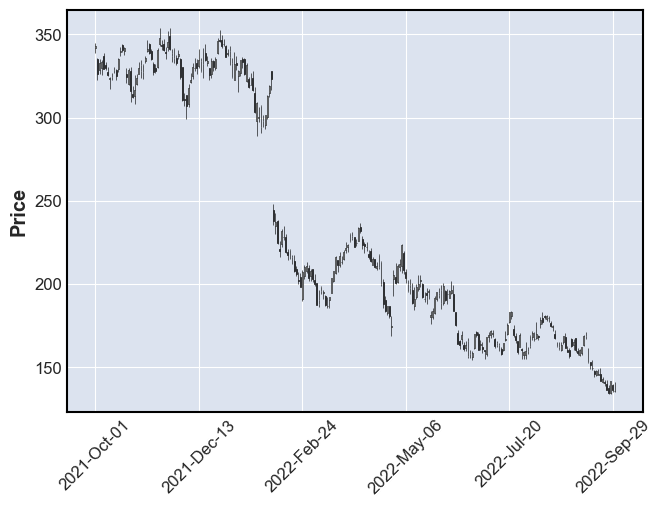

<Figure size 640x480 with 0 Axes>

In [24]:
mpf.plot(yahoo.drop('Adj Close', axis=1), type='candle')
plt.tight_layout()

### IEX

IEX is an alternative exchange started in response to the HFT controversy and portrayed in Michael Lewis' controversial Flash Boys. It aims to slow down the speed of trading to create a more level playing field and has been growing rapidly since launch in 2016 while still small with a market share of around 2.5% in June 2018.

> **Note:** IEX now requires an [API](https://iexcloud.io/) key after registration for (free) account that you can store as environment variable and retrieve as illustrated below, or pass directly via keyword argument to `pandas_datareader`.

In [47]:
import os   

os.environ["IEX_API_KEY"] = "pk_79658812f6fa48e38f51057a6badad4f"

IEX_API_KEY=os.getenv('IEX_API_KEY')

key = 'IEX_API_KEY'

value = os.getenv(key)

print("Value of 'IEX_API_KEY' environment variable :", value)

Value of 'IEX_API_KEY' environment variable : pk_79658812f6fa48e38f51057a6badad4f


In [48]:
start = datetime(2015, 2, 9)
# end = datetime(2017, 5, 24)

iex = web.DataReader('FB', 'iex', start, api_key=IEX_API_KEY)
iex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1847 entries, 2015-02-09 to 2022-06-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1847 non-null   float64
 1   high    1847 non-null   float64
 2   low     1847 non-null   float64
 3   close   1847 non-null   float64
 4   volume  1847 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 86.6+ KB


In [49]:
iex.tail()

,open,high,low,close,volume
date,,,,,
2022-06-02,188.45,200.935,187.73,198.86,31951582
2022-06-03,195.98,196.610,189.78,190.78,19464993
2022-06-06,193.99,196.920,188.40,194.25,30574242
2022-06-07,191.93,196.530,191.49,195.65,18828687
2022-06-08,194.67,202.030,194.41,196.64,22267154


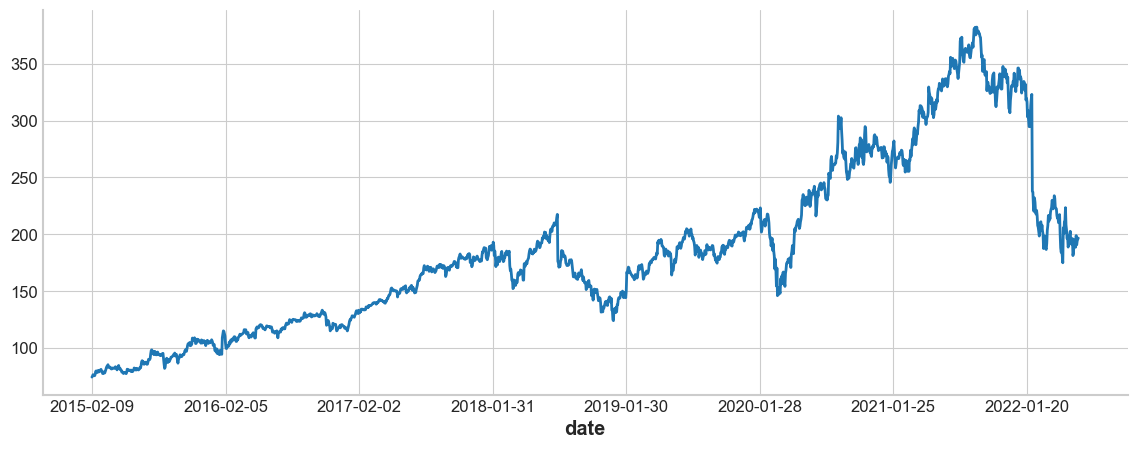

In [50]:
sns.set_style('whitegrid')
iex.close.plot(figsize=(14, 5))
sns.despine()

#### Book Data

In addition to historical EOD price and volume data, IEX provides real-time depth of book quotations that offer an aggregated size of orders by price and side. This service also includes last trade price and size information.

DEEP is used to receive real-time depth of book quotations direct from IEX. The depth of book quotations received via DEEP provide an aggregated size of resting displayed orders at a price and side, and do not indicate the size or number of individual orders at any price level. Non-displayed orders and non-displayed portions of reserve orders are not represented in DEEP.

DEEP also provides last trade price and size information. Trades resulting from either displayed or non-displayed orders matching on IEX will be reported. Routed executions will not be reported.

Only works on trading days.

In [1]:
book = web.get_iex_book('AAPL')

In [13]:
list(book.keys())

['symbol',
 'marketPercent',
 'volume',
 'lastSalePrice',
 'lastSaleSize',
 'lastSaleTime',
 'lastUpdated',
 'bids',
 'asks',
 'systemEvent',
 'tradingStatus',
 'opHaltStatus',
 'ssrStatus',
 'securityEvent',
 'trades',
 'tradeBreaks']

In [14]:
orders = pd.concat([pd.DataFrame(book[side]).assign(side=side) for side in ['bids', 'asks']])
orders.head()

,side


In [15]:
for key in book.keys():
    try:
        print(f'\n{key}')
        print(pd.DataFrame(book[key]))
    except:
        print(book[key])


symbol
AAPL

marketPercent
0.01824

volume
1874997

lastSalePrice
125.98

lastSaleSize
3

lastSaleTime
1614027994379

lastUpdated
1614031191208

bids
Empty DataFrame
Columns: []
Index: []

asks
Empty DataFrame
Columns: []
Index: []

systemEvent
{'systemEvent': 'C', 'timestamp': 1614031800007}

tradingStatus
{'status': 'T', 'reason': '    ', 'timestamp': 1613996038606}

opHaltStatus
{'isHalted': False, 'timestamp': 1613996038606}

ssrStatus
{'isSSR': False, 'detail': ' ', 'timestamp': 1613996038606}

securityEvent
{'securityEvent': 'MarketClose', 'timestamp': 1614027600000}

trades
      price  size     tradeId  isISO  isOddLot  isOutsideRegularHours  \
0   125.980     3  2565301038   True      True                   True   
1   126.010    20  2561192133  False      True                  False   
2   126.010    35  2561162510  False      True                  False   
3   126.005   100  2560819178  False     False                  False   
4   126.005   100  2560535358  False     False

In [16]:
pd.DataFrame(book['trades']).head()

,price,size,tradeId,isISO,isOddLot,isOutsideRegularHours,isSinglePriceCross,isTradeThroughExempt,timestamp
0,125.980,3,2565301038,True,True,True,False,False,1614027994379
1,126.010,20,2561192133,False,True,False,False,False,1614027597753
2,126.010,35,2561162510,False,True,False,False,False,1614027597658
3,126.005,100,2560819178,False,False,False,False,False,1614027596970
4,126.005,100,2560535358,False,False,False,False,False,1614027596307


### Quandl

Obtain Quandl [API Key](https://www.quandl.com/tools/api) and store in environment variable as `QUANDL_API_KEY`.

In [56]:
import os   

os.environ["QUANDL_API_KEY"] = "yGe56CBmpf1sucMhBHg8"

QUANDL_API_KEY=os.getenv('QUANDL_API_KEY')

key = 'QUANDL_API_KEY'

value = os.getenv(key)

print("Value of 'QUANDL_API_KEY' environment variable :", value)

Value of 'QUANDL_API_KEY' environment variable : yGe56CBmpf1sucMhBHg8


In [57]:
symbol = 'FB.US'

quandl = web.DataReader(symbol, 'quandl', '2015-01-01')
quandl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 813 entries, 2018-03-27 to 2015-01-02
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        813 non-null    float64
 1   High        813 non-null    float64
 2   Low         813 non-null    float64
 3   Close       813 non-null    float64
 4   Volume      813 non-null    float64
 5   ExDividend  813 non-null    float64
 6   SplitRatio  813 non-null    float64
 7   AdjOpen     813 non-null    float64
 8   AdjHigh     813 non-null    float64
 9   AdjLow      813 non-null    float64
 10  AdjClose    813 non-null    float64
 11  AdjVolume   813 non-null    float64
dtypes: float64(12)
memory usage: 82.6 KB


### FRED

In [58]:
start = datetime(2010, 1, 1)

end = datetime(2013, 1, 27)

gdp = web.DataReader('GDP', 'fred', start, end)

gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2010-01-01 to 2013-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     13 non-null     float64
dtypes: float64(1)
memory usage: 208.0 bytes


In [59]:
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)
inflation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2010-01-01 to 2013-01-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  37 non-null     float64
 1   CPILFESL  37 non-null     float64
dtypes: float64(2)
memory usage: 888.0 bytes


### Fama/French

In [61]:
from pandas_datareader.famafrench import get_available_datasets
get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [62]:
ds = web.DataReader('5_Industry_Portfolios', 'famafrench')
print(ds['DESCR'])

5 Industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 202208 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2022 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (59 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (59 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (5 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (5 rows x 5 cols)
  4 : Number of Firms in Portfolios (59 rows x 5 cols)
  5 : Average Firm Size (59 rows x 5 cols)
  6 : Sum of BE / Sum of ME (6 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (6 rows x 5 cols)


### World Bank

In [63]:
from pandas_datareader import wb
gdp_variables = wb.search('gdp.*capita.*const')
gdp_variables.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10625,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10627,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10629,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10630,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [64]:
wb_data = wb.download(indicator='NY.GDP.PCAP.KD', 
                      country=['US', 'CA', 'MX'], 
                      start=1990, 
                      end=2019)
wb_data.head()

NY.GDP.PCAP.KD
country year                
Canada  2019    45109.244486
        2018    44917.483728
        2017    44325.488337
        2016    43536.913403
        2015    43596.135537

### OECD

In [65]:
df = web.DataReader('TUD', 'oecd', start='2010', end='2019')
df[['Japan', 'United States']]

Country,Japan,United States
Frequency,Annual,Annual
Measure,Percentage of employees,Percentage of employees
Time,,
2010-01-01,18.400000,11.4
2011-01-01,19.000000,11.3
2012-01-01,18.000000,10.8
2013-01-01,17.799999,10.8
2014-01-01,17.600000,10.7
2015-01-01,17.400000,10.3
2016-01-01,17.000000,10.1




### Stooq

Google finance stopped providing common index data download. The Stooq site had this data for download for a while but is currently broken, awaiting release of [fix](https://github.com/pydata/pandas-datareader/issues/594)

In [66]:
index_url = 'https://stooq.com/t/'
ix = pd.read_html(index_url)
len(ix)

49

In [67]:
sp500_stooq = web.DataReader('^SPX', 'stooq')
sp500_stooq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2022-09-30 to 2017-10-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   float64
dtypes: float64(5)
memory usage: 58.9 KB


In [68]:
sp500_stooq.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-09-30,3633.48,3671.44,3584.13,3585.62,3.139151e+09
2022-09-29,3687.01,3687.01,3610.40,3640.47,2.604840e+09
2022-09-28,3651.94,3736.74,3640.61,3719.04,2.634240e+09
2022-09-27,3686.44,3717.53,3623.29,3647.29,2.543929e+09
2022-09-26,3682.72,3715.67,3644.76,3655.04,2.631141e+09


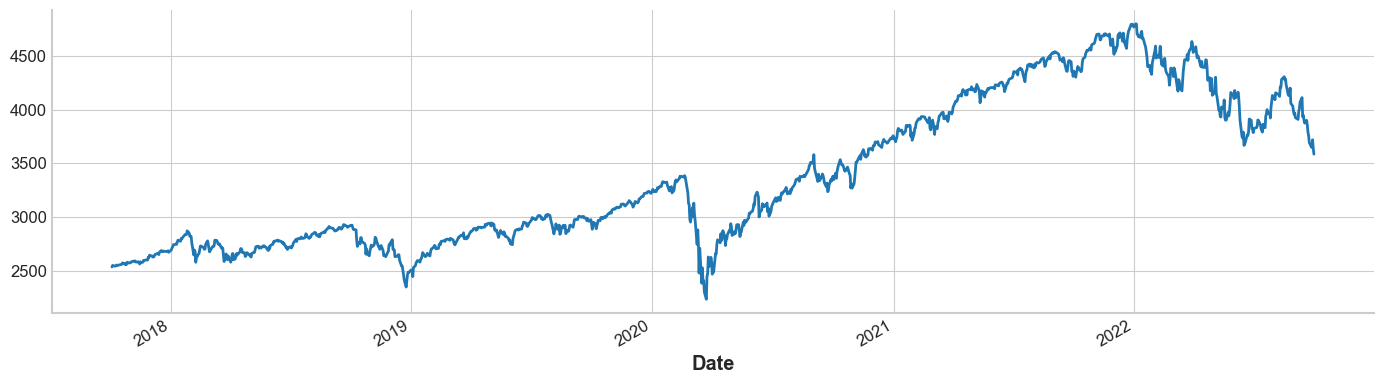

In [69]:
sp500_stooq.Close.plot(figsize=(14,4))
sns.despine()
plt.tight_layout()

### NASDAQ Symbols

In [70]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
symbols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12215 entries, A to ZYXI
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Nasdaq Traded     12215 non-null  bool    
 1   Security Name     12215 non-null  object  
 2   Listing Exchange  12215 non-null  category
 3   Market Category   12215 non-null  object  
 4   ETF               12215 non-null  bool    
 5   Round Lot Size    12215 non-null  float64 
 6   Test Issue        12215 non-null  bool    
 7   Financial Status  5729 non-null   category
 8   CQS Symbol        6486 non-null   object  
 9   NASDAQ Symbol     12214 non-null  object  
 10  NextShares        12215 non-null  bool    
dtypes: bool(4), category(2), float64(1), object(4)
memory usage: 644.5+ KB


### Tiingo

Requires [signing up](https://api.tiingo.com/) and storing API key in environment

In [71]:
import os   

os.environ["TIINGO_API_KEY"] = "85afc0505c953dd16d1f664295ba1edb7949f70b"

QUANDL_API_KEY=os.getenv('TIINGO_API_KEY')

key = 'TIINGO_API_KEY'

value = os.getenv(key)

print("Value of 'TIINGO_API_KEY' environment variable :", value)

Value of 'TIINGO_API_KEY' environment variable : 85afc0505c953dd16d1f664295ba1edb7949f70b


In [72]:
df = web.get_data_tiingo('GOOG', api_key=os.getenv('TIINGO_API_KEY'))

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1257 entries, ('GOOG', Timestamp('2017-10-04 00:00:00+0000', tz='UTC')) to ('GOOG', Timestamp('2022-09-30 00:00:00+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        1257 non-null   float64
 1   high         1257 non-null   float64
 2   low          1257 non-null   float64
 3   open         1257 non-null   float64
 4   volume       1257 non-null   int64  
 5   adjClose     1257 non-null   float64
 6   adjHigh      1257 non-null   float64
 7   adjLow       1257 non-null   float64
 8   adjOpen      1257 non-null   float64
 9   adjVolume    1257 non-null   int64  
 10  divCash      1257 non-null   float64
 11  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 171.5+ KB
